<a href="https://colab.research.google.com/github/charan-debug/MDSC-102-Infrential-Statistics/blob/main/MDSC-102-ASSIGNMENT-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Making inferences from given data set and normalising it by removing the skewness**



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.special import boxcox
from scipy import stats

In [2]:
dataset = pd.read_csv(r"wine.data")

dataset.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]

df = dataset.copy()

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.info()
#float continuous rv
#integer means its descrete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [6]:
df.shape

(177, 14)

In [11]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Class'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Alcohol'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Malic acid'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Class'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Alcohol'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Malic acid'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Ash'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Class', 'Alcohol'], ['Alcohol', 'Malic acid'], ['Malic acid', 'Ash'], ['Ash', 'Alcalinity of ash']]], **{})
chart

<Figure size 1800x2500 with 0 Axes>

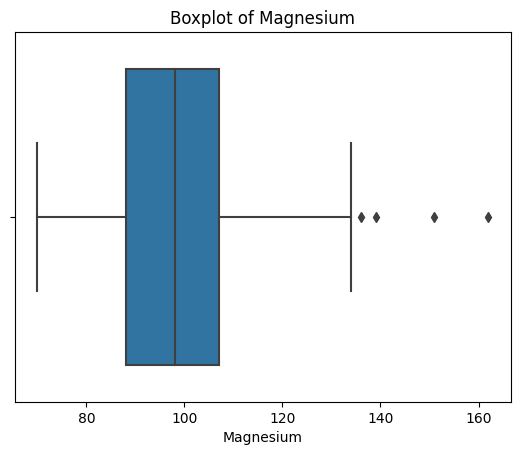

<Figure size 1800x2500 with 0 Axes>

In [18]:
i=1
sns.boxplot(x=df['Magnesium'])
plt.title('Boxplot of Magnesium')  # Set the title of the graph
plt.figure(figsize=(18,25))


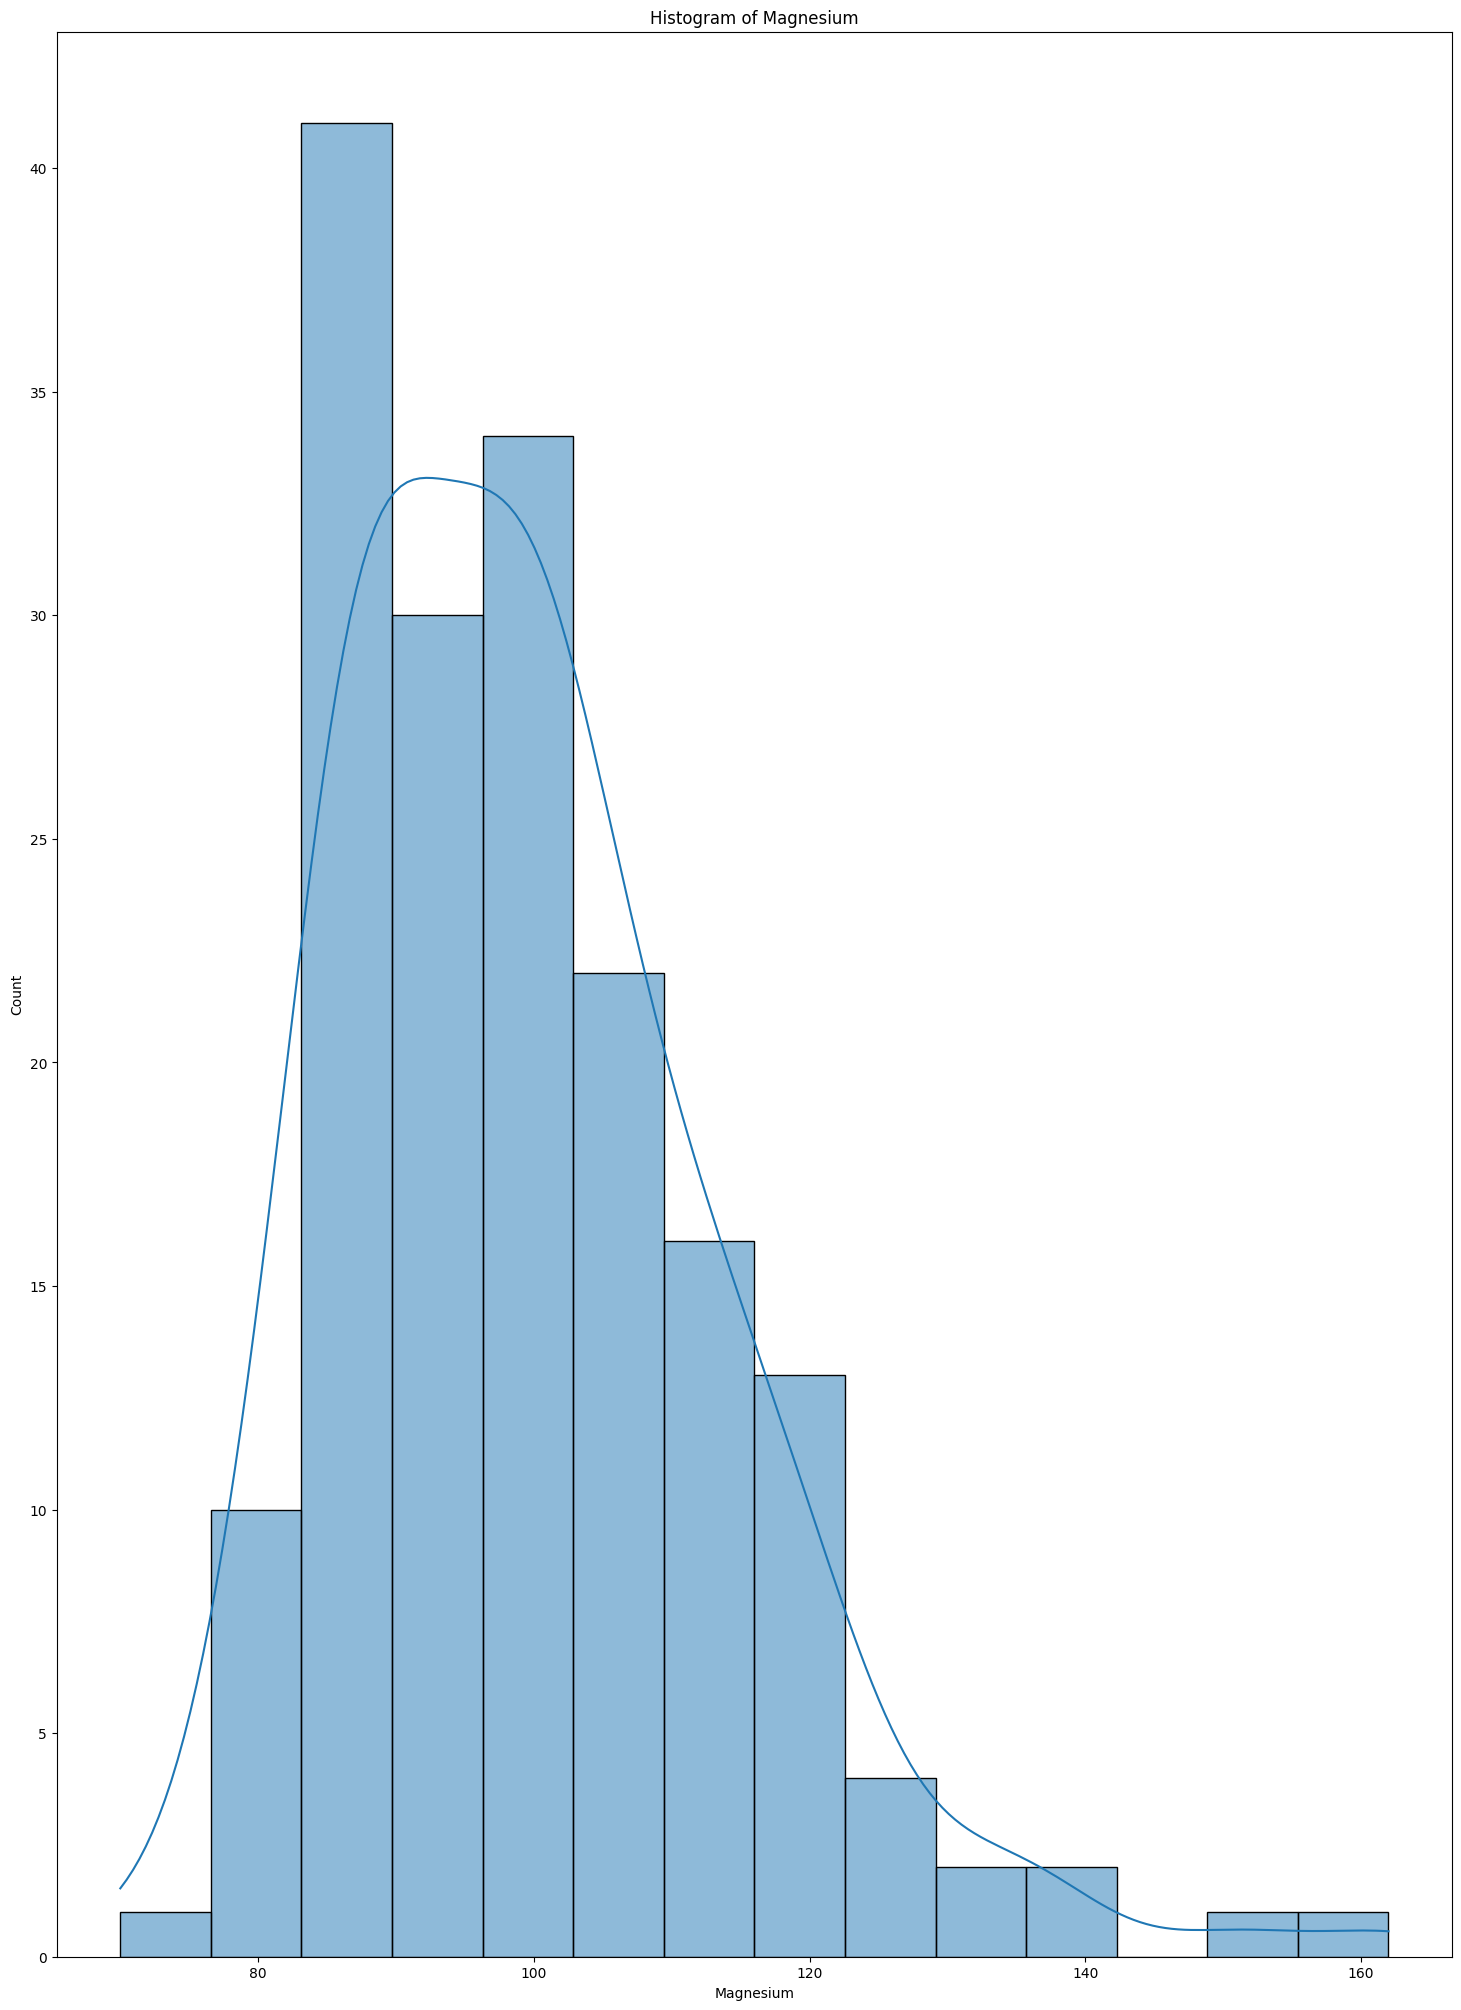

In [19]:
plt.figure(figsize=(18, 25))
sns.histplot(x=df['Magnesium'],kde=True)
plt.title('Histogram of Magnesium')  # Set the title of the graph
plt.show()  # Display the graph


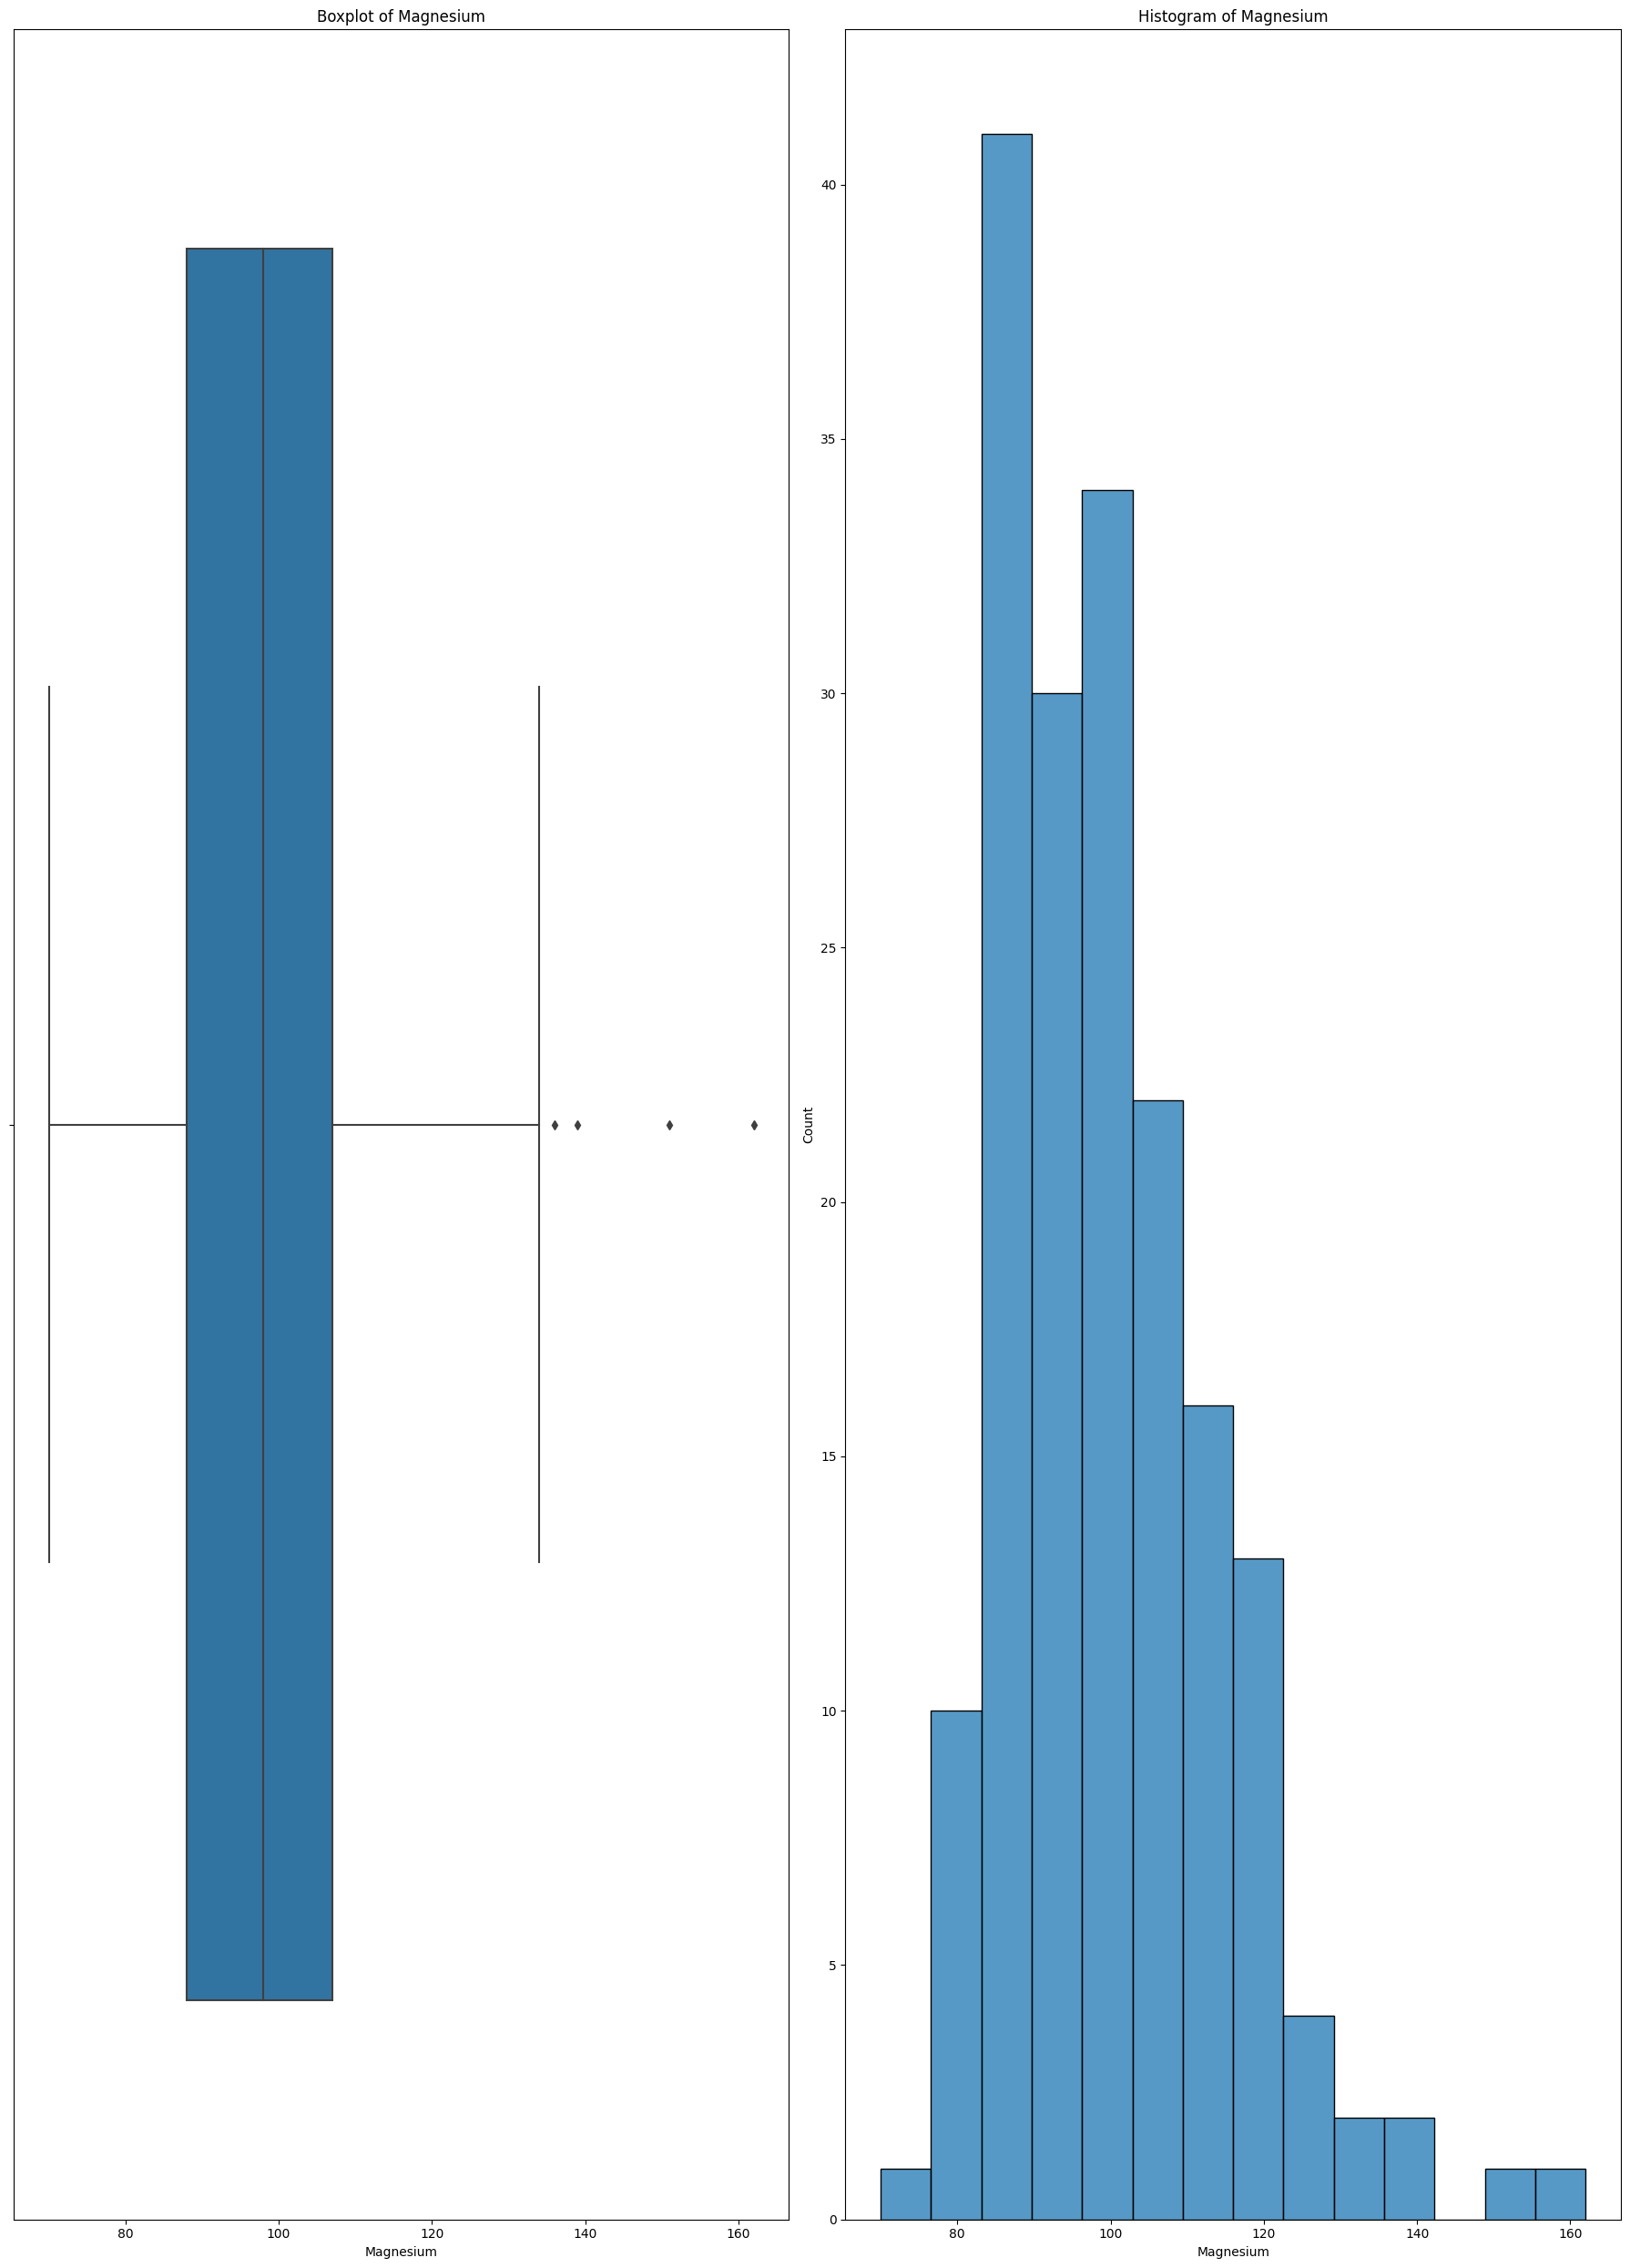

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(18, 25))

sns.boxplot(x=df['Magnesium'], ax=axes[0])
axes[0].set_title('Boxplot of Magnesium')

sns.histplot(x=df['Magnesium'], ax=axes[1])
axes[1].set_title('Histogram of Magnesium')

plt.tight_layout()

plt.show()


In [26]:
df.skew()

Class                           0.097941
Alcohol                        -0.046483
Malic acid                      1.030975
Ash                            -0.172406
Alcalinity of ash               0.204076
Magnesium                       1.122148
Total phenols                   0.097688
Flavanoids                      0.036880
Nonflavanoid phenols            0.440937
Proanthocyanins                 0.532787
Color intensity                 0.870850
Hue                             0.026964
OD280/OD315 of diluted wines   -0.320424
Proline                         0.783800
dtype: float64

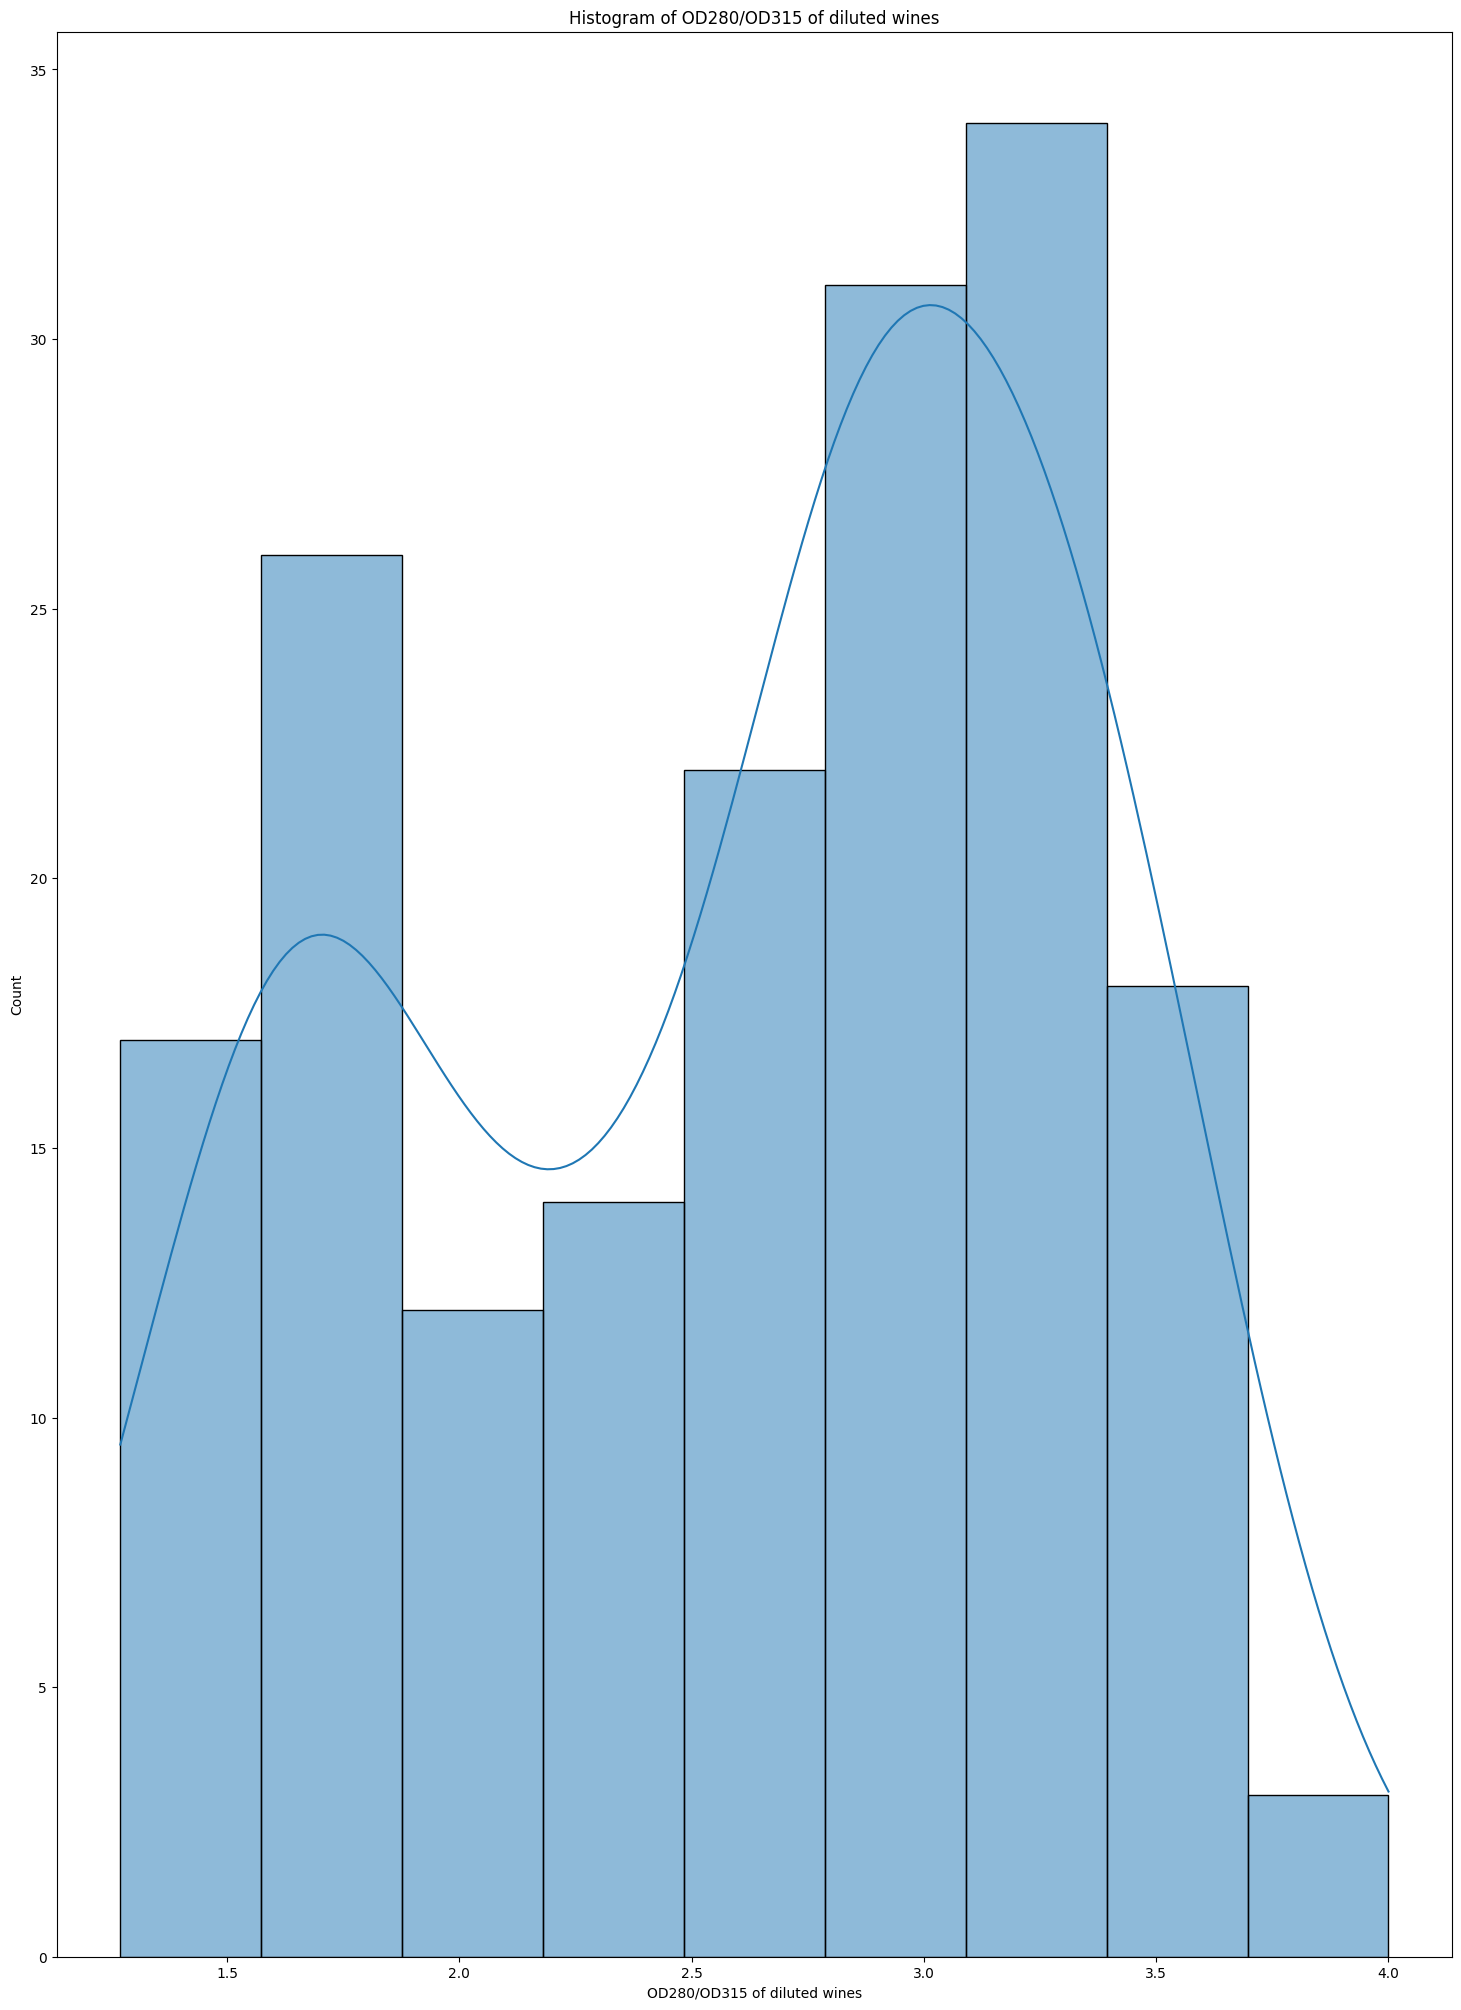

In [28]:
plt.figure(figsize=(18, 25))
sns.histplot(x=df['OD280/OD315 of diluted wines'],kde=True)
plt.title('Histogram of OD280/OD315 of diluted wines')  # Set the title of the graph
plt.show()  # Display the graph

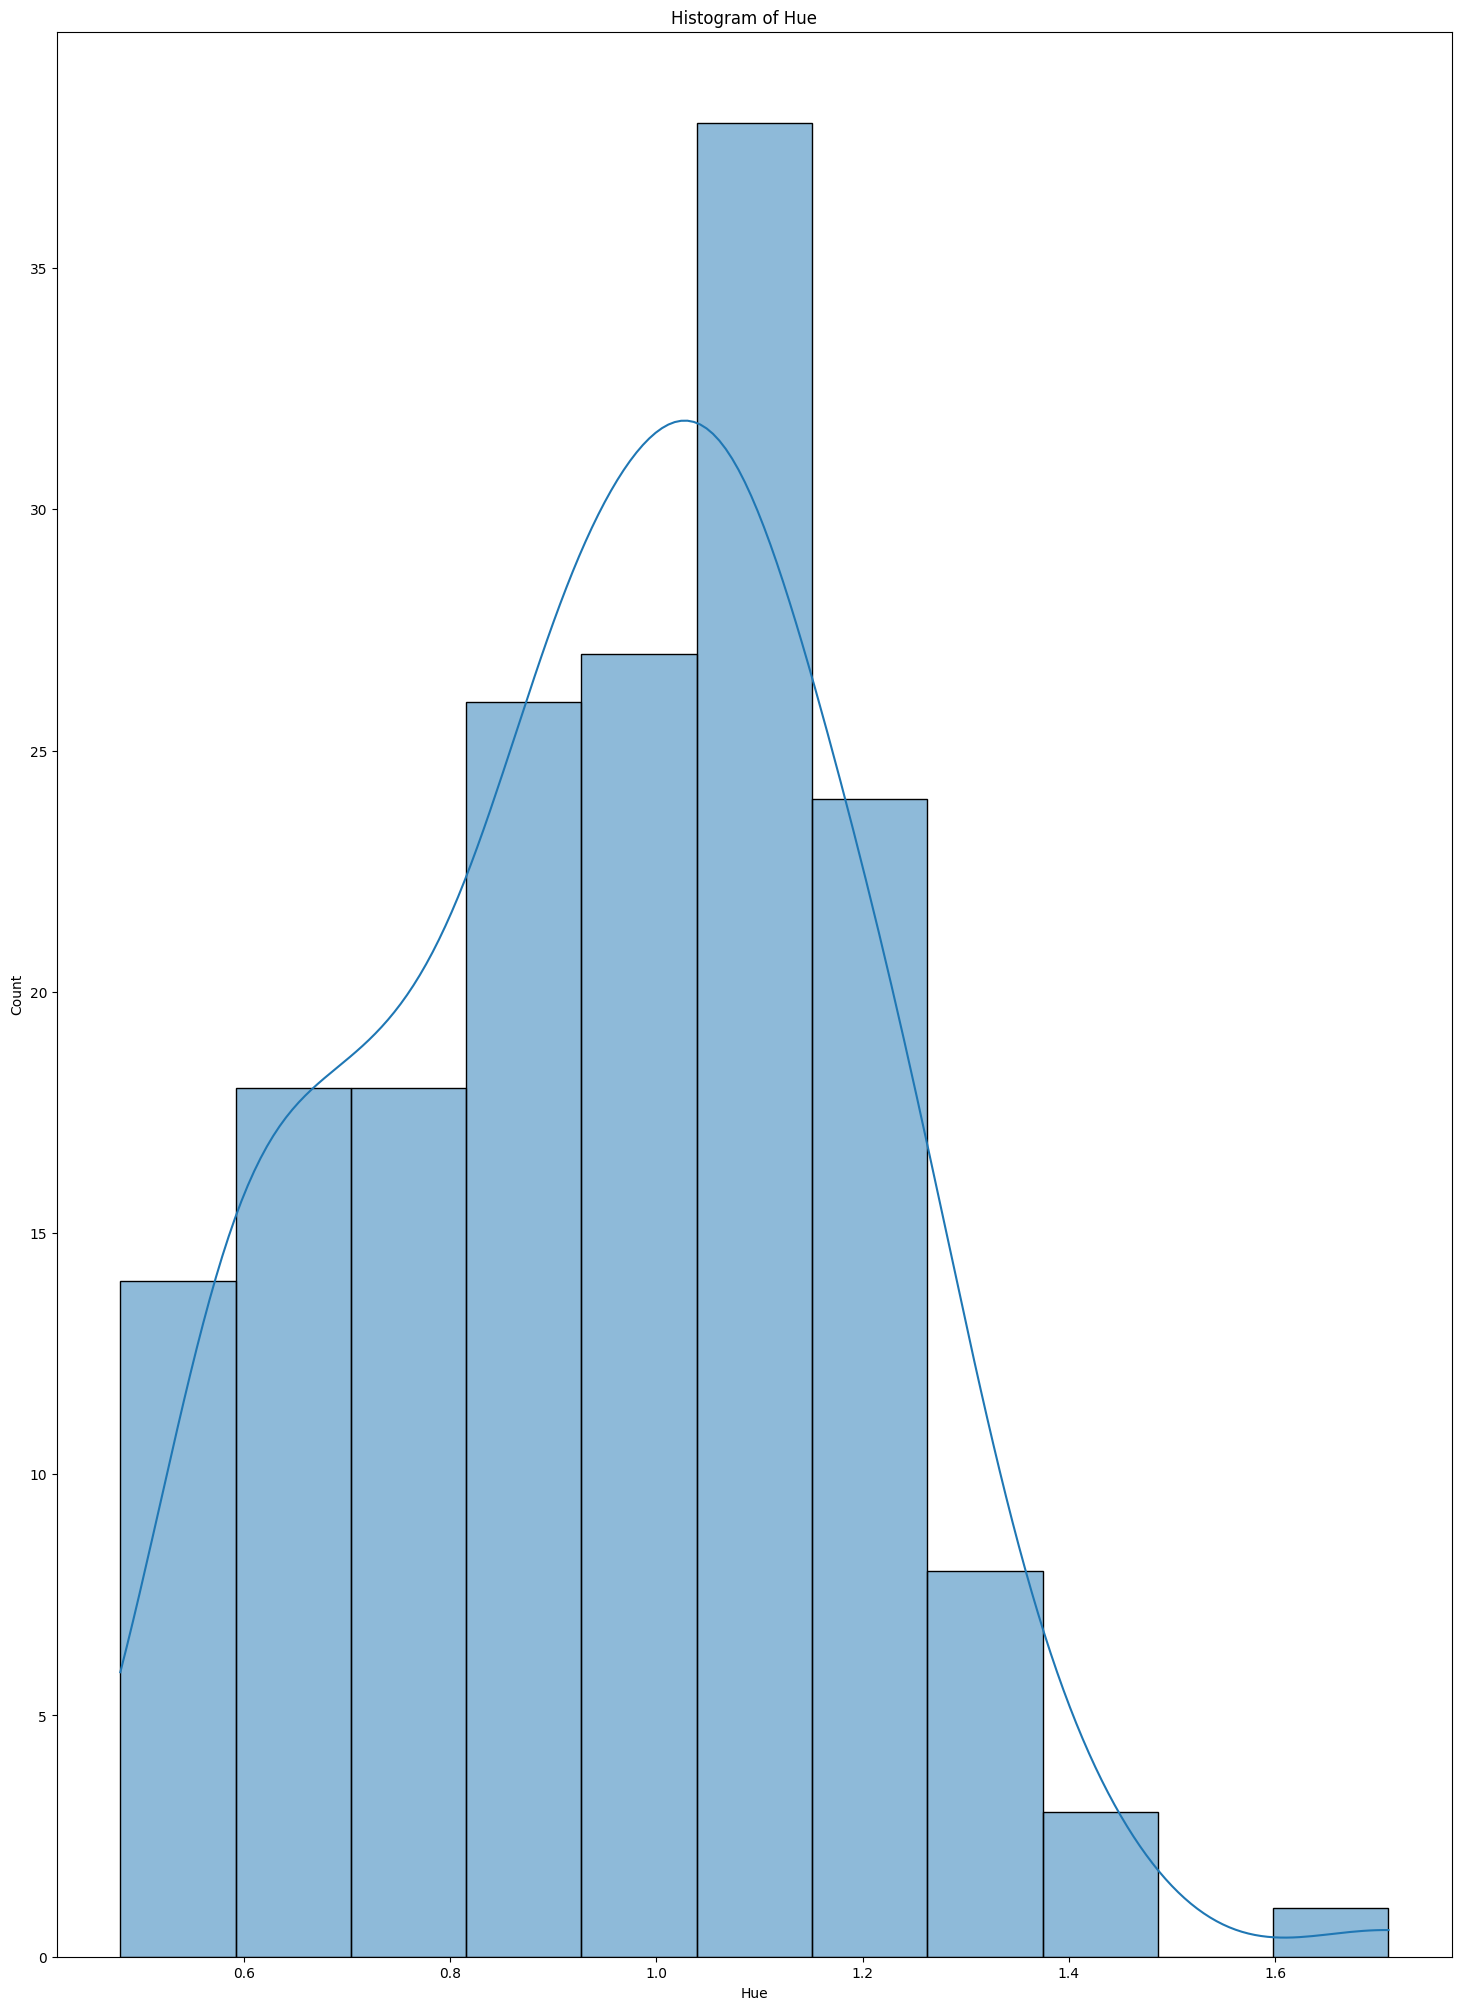

In [30]:
plt.figure(figsize=(18, 25))
sns.histplot(x=df['Hue'],kde=True)
plt.title('Histogram of Hue    ')  # Set the title of the graph
plt.show()  # Display the graph

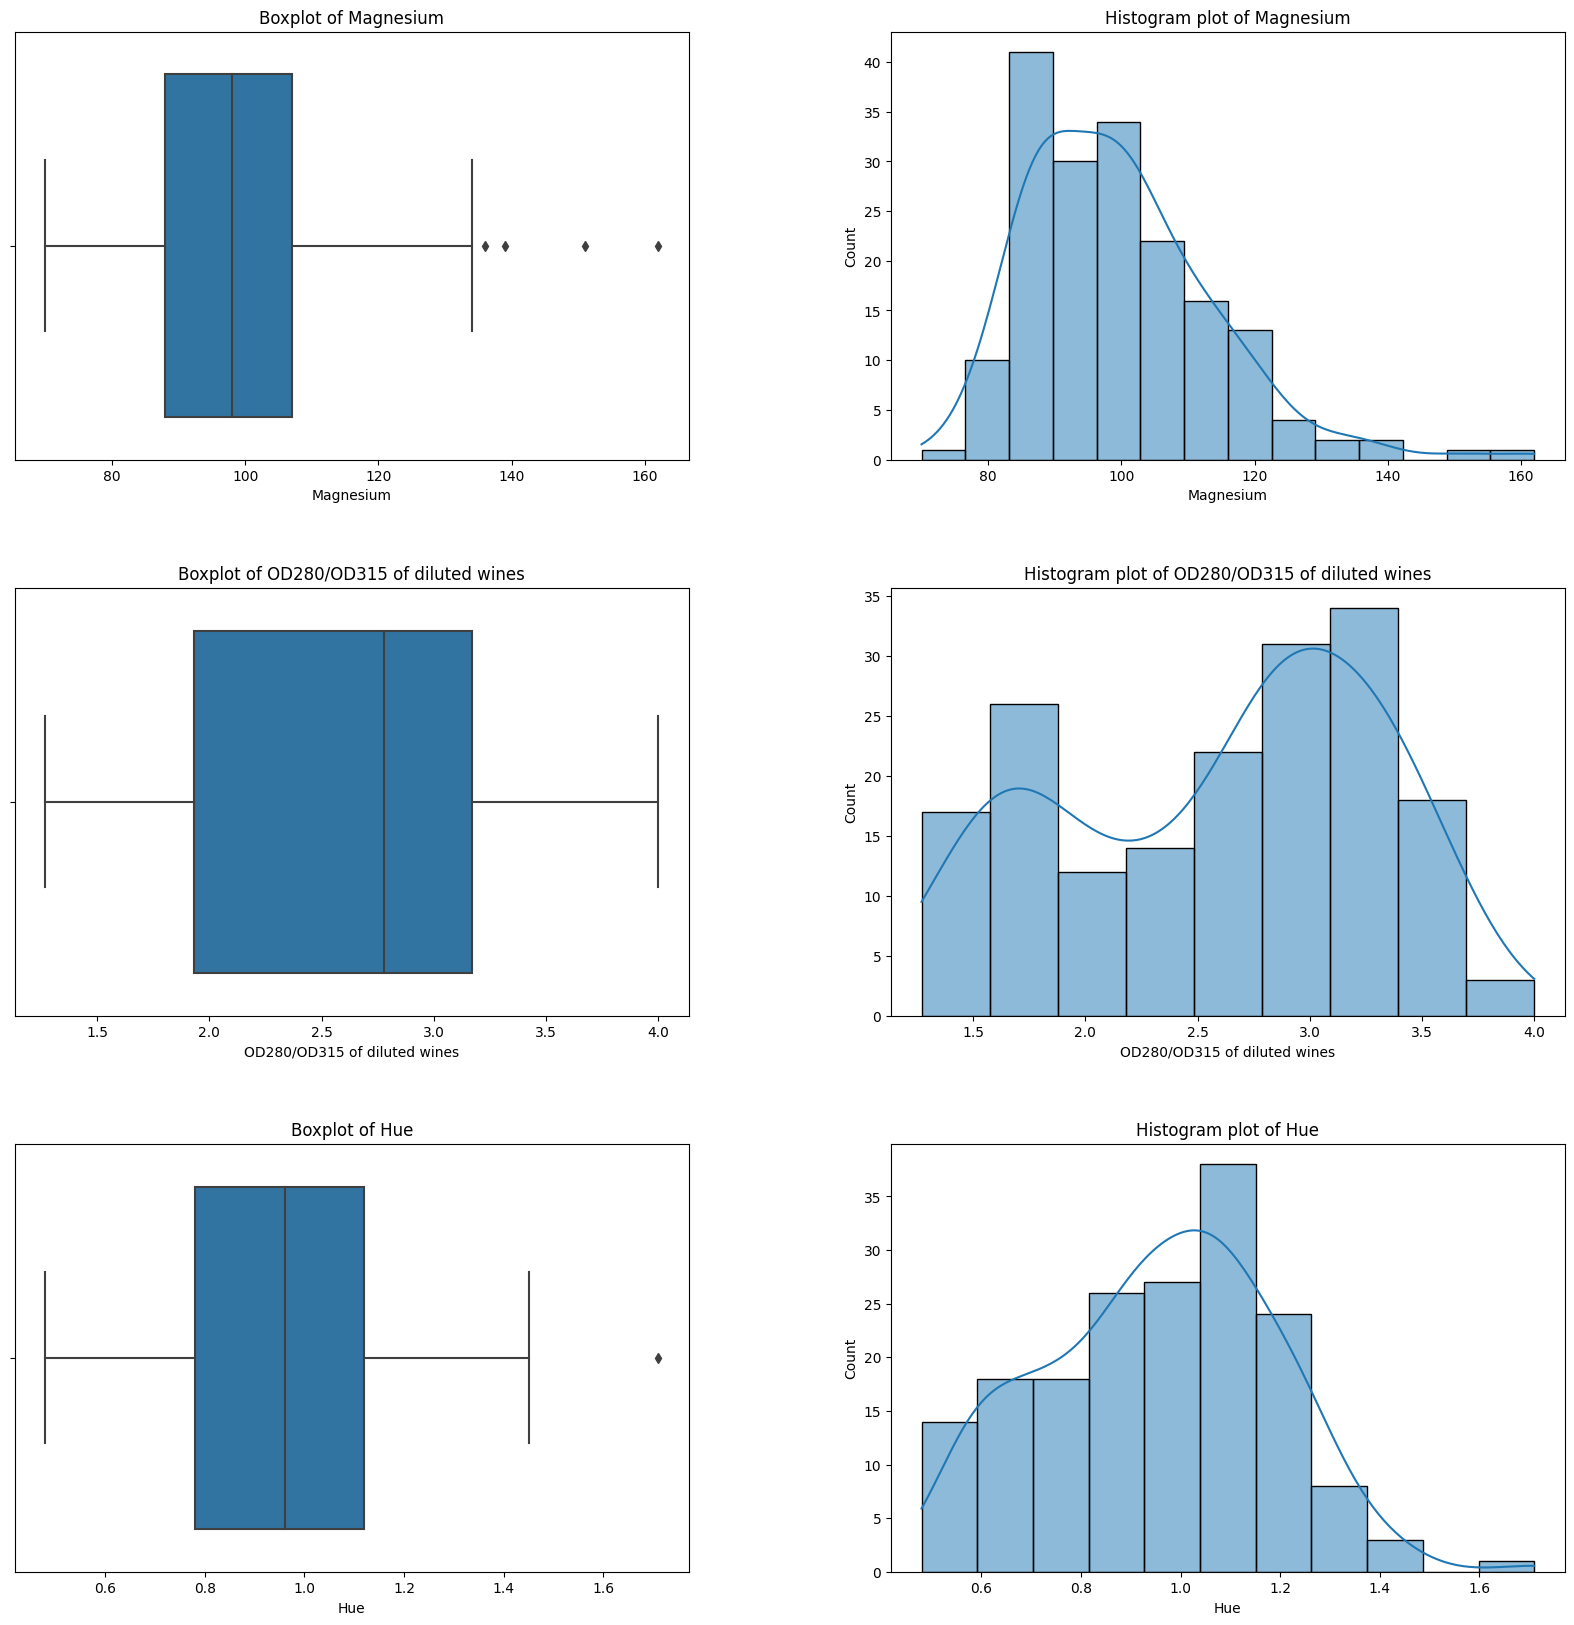

In [57]:
fig , axes = plt.subplots(3,2,figsize=(20,20))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

sns.boxplot(data = df, x = 'Magnesium', ax=axes[0,0])
sns.boxplot(data = df, x = 'OD280/OD315 of diluted wines', ax=axes[1,0])
sns.boxplot(data = df, x = 'Hue', ax=axes[2,0])
sns.histplot(kde=True,data=df,x='Magnesium', ax=axes[0,1])
sns.histplot(kde=True,data=df,x='OD280/OD315 of diluted wines', ax=axes[1,1])
sns.histplot(kde=True,data=df,x='Hue', ax=axes[2,1])

axes[0,0].set_title("Boxplot of Magnesium")
axes[0,1].set_title("Histogram plot of Magnesium")
axes[1,0].set_title("Boxplot of OD280/OD315 of diluted wines")
axes[1,1].set_title("Histogram plot of OD280/OD315 of diluted wines")
axes[2,0].set_title("Boxplot of Hue")
axes[2,1].set_title("Histogram plot of Hue")
plt.savefig('plots')

In [62]:
#transforming Magnesium into sqrt
sq_root = np.sqrt(df['Magnesium'])
sq_root

0      10.000000
1      10.049876
2      10.630146
3      10.862780
4      10.583005
         ...    
172     9.746794
173    10.099505
174    10.954451
175    10.954451
176     9.797959
Name: Magnesium, Length: 177, dtype: float64

In [59]:
sq_root.skew()

0.8552083333548858

In [60]:
#transforming Magnesium into ln
ln = np.log(df['Magnesium'])
ln

0      4.605170
1      4.615121
2      4.727388
3      4.770685
4      4.718499
         ...   
172    4.553877
173    4.624973
174    4.787492
175    4.787492
176    4.564348
Name: Magnesium, Length: 177, dtype: float64

In [63]:
ln.skew()

0.6127718613722887

In [66]:
#transforming Magnesium into 1/Magnesium
by = 1/(df['Magnesium'])
by

0      0.010000
1      0.009901
2      0.008850
3      0.008475
4      0.008929
         ...   
172    0.010526
173    0.009804
174    0.008333
175    0.008333
176    0.010417
Name: Magnesium, Length: 177, dtype: float64

In [67]:
by.skew()

-0.18002900457053003

In [75]:
# using boxcox finding lambda value
x = df['Magnesium']
arr, lamb = sp.stats.boxcox(x)
lamb

-1.4382089996675784

In [76]:
boxcox = (df['Magnesium']**lamb-1)/lamb
boxcox

0      0.694385
1      0.694398
2      0.694534
3      0.694581
4      0.694524
         ...   
172    0.694314
173    0.694411
174    0.694598
175    0.694598
176    0.694329
Name: Magnesium, Length: 177, dtype: float64

In [77]:
boxcox.skew()

0.003965846391651626

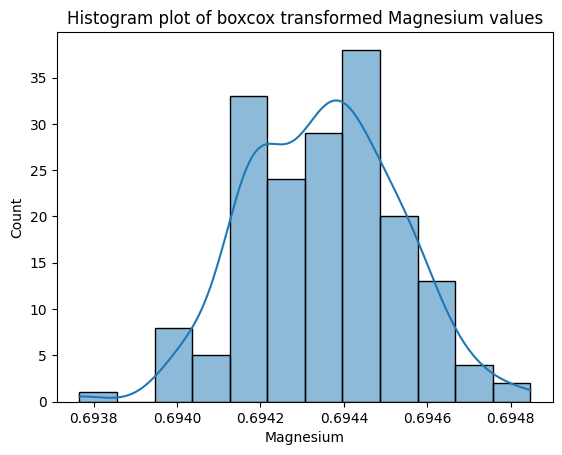

In [78]:
sns.histplot(x=boxcox, kde=True, data=df)
plt.title('Histogram plot of boxcox transformed Magnesium values')
plt.show()

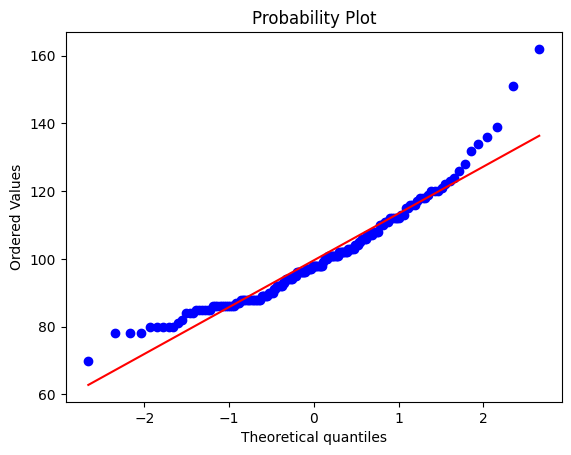

In [80]:
#Probability plot of Magnesium
x=df['Magnesium']
qq_plot = stats.probplot(x, plot=plt)

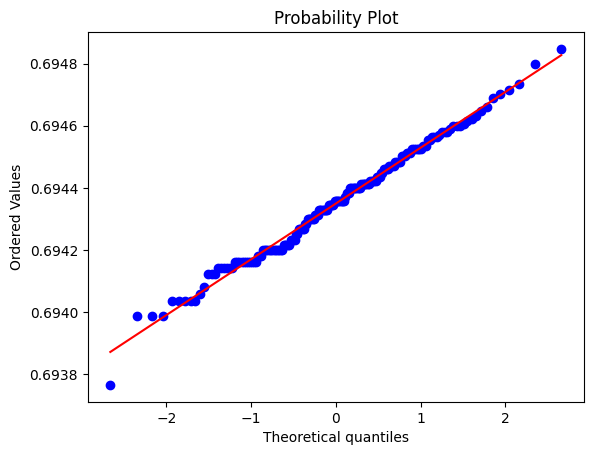

In [81]:
qq = stats.probplot(boxcox, plot=plt)    #Probability plot of transformed Magnesium using boxcox

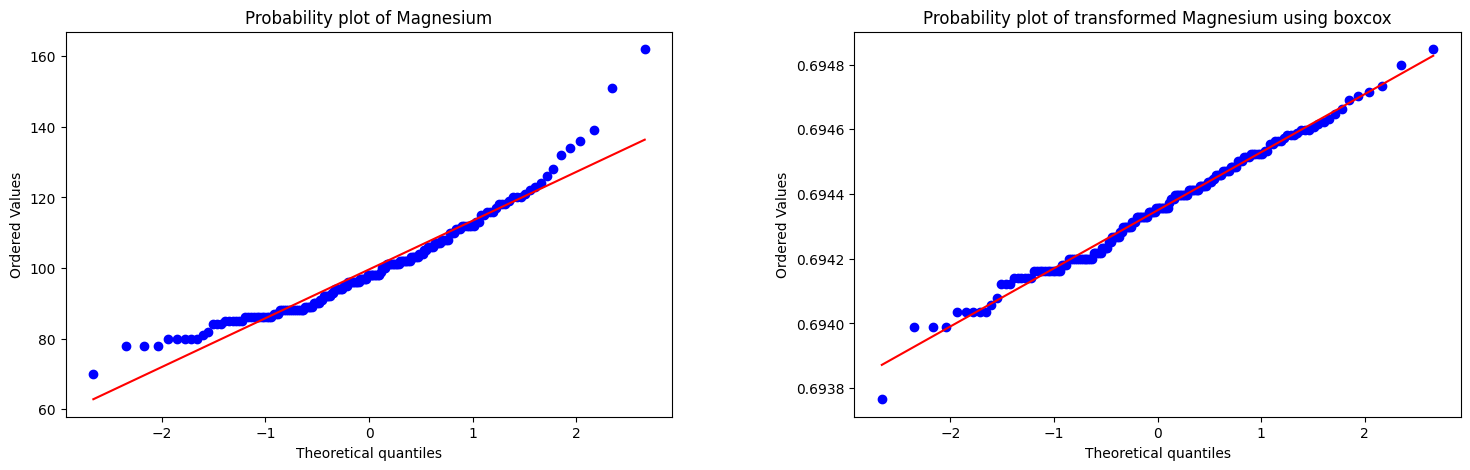

In [82]:
fig , axes = plt.subplots(1,2,figsize=(18,5))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

stats.probplot(x, plot=axes[0])
stats.probplot(boxcox, plot=axes[1])

axes[0].set_title("Probability plot of Magnesium")
axes[1].set_title("Probability plot of transformed Magnesium using boxcox")
plt.show()